This notebook is used for predictive analysis of covid 19 based on the dataset provided in the course:

We would try to answer the following questions


In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
from scipy.stats import *
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns # informative statistical graphics.
import statsmodels.api as sm #for ARIMA and SARIMAX
import datetime
from datetime import timedelta
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("/Users/shubhabrataroy/Desktop/eMBA/Digital Economy Summer Specialization 2021/Big Data and Business Analytics/tableau/Covid19JHH_days.csv")

In [3]:
df.head(10)

,PSCR,theDate,Country.Region,Province.State,Lat,Long,confirmed,recovered,deaths,population,...,day_20,day_100,day_400,day_1000,day_2000,day_5000,day_10000,day_1e+05,day_1e+06,day_1e+07
0,Afghanistan,2020-01-22,Afghanistan,NaN,33.93911,67.709953,0,0.0,0,37172386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-23,Afghanistan,NaN,33.93911,67.709953,0,0.0,0,37172386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-01-24,Afghanistan,NaN,33.93911,67.709953,0,0.0,0,37172386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-01-25,Afghanistan,NaN,33.93911,67.709953,0,0.0,0,37172386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-01-26,Afghanistan,NaN,33.93911,67.709953,0,0.0,0,37172386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,2020-01-27,Afghanistan,NaN,33.93911,67.709953,0,0.0,0,37172386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,2020-01-28,Afghanistan,NaN,33.93911,67.709953,0,0.0,0,37172386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,2020-01-29,Afghanistan,NaN,33.93911,67.709953,0,0.0,0,37172386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,2020-01-30,Afghanistan,NaN,33.93911,67.709953,0,0.0,0,37172386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,2020-01-31,Afghanistan,NaN,33.93911,67.709953,0,0.0,0,37172386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets filter on only United States

In [28]:
df_US = df[df["PSCR"]=="United States"]

In [29]:
df_US.columns

Index(['PSCR', 'theDate', 'Country.Region', 'Province.State', 'Lat', 'Long',
       'confirmed', 'recovered', 'deaths', 'population', 'Region', 'ISOcode',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'imputed', 'recovered_imputed', 'year', 'month', 'monthday', 'active',
       'active_imputed', 'untouched', 'untouched_imputed',
       'people_single_vaccinated', 'new_confirmed', 'net_active',
       'net_active_imputed', 'new_recovered', 'new_recovered_imputed',
       'new_deaths', 'confirmed_p_M', 'active_p_M', 'active_imputed_p_M',
       'recovered_p_M', 'recovered_imputed_p_M', 'deaths_p_M', 'untouched_p_M',
       'people_vaccinated_p_M', 'total_vaccinations_p_M',
       'people_fully_vaccinated_p_M', 'people_single_vaccinated_p_M',
   

In [30]:
df_US = df_US[["theDate", "new_recovered_imputed_p_M", "active_imputed_p_M", "new_confirmed_p_M"]]

In [7]:
df_US.head(10)

,theDate,new_recovered_imputed_p_M,active_imputed_p_M,new_confirmed_p_M
163710,2020-01-22,NaN,0.003057,NaN
163711,2020-01-23,0.0,0.003057,0.000000
163712,2020-01-24,0.0,0.006113,0.003057
163713,2020-01-25,0.0,0.006113,0.000000
163714,2020-01-26,0.0,0.015283,0.009170
163715,2020-01-27,0.0,0.015283,0.000000
163716,2020-01-28,0.0,0.015283,0.000000
163717,2020-01-29,0.0,0.018339,0.003057
163718,2020-01-30,0.0,0.018339,0.000000
163719,2020-01-31,0.0,0.024452,0.006113


In [9]:
df_US.tail(10)

,theDate,new_recovered_imputed_p_M,active_imputed_p_M,new_confirmed_p_M
164210,2021-06-05,161.318012,3937.681035,42.510343
164211,2021-06-06,97.289634,3856.374042,16.490028
164212,2021-06-07,143.846835,3758.943807,47.364127
164213,2021-06-08,152.723024,3644.965470,39.768628
164214,2021-06-09,166.113721,3534.508266,56.992225
164215,2021-06-10,175.616501,3402.043982,44.451246
164216,2021-06-11,174.720935,3301.468569,76.120046
164217,2021-06-12,136.795400,3188.905409,25.085015
164218,2021-06-13,89.116449,3113.433350,13.983666
164219,2021-06-14,153.065357,2998.696991,38.848610


In [31]:
df_US.dropna(inplace = True)

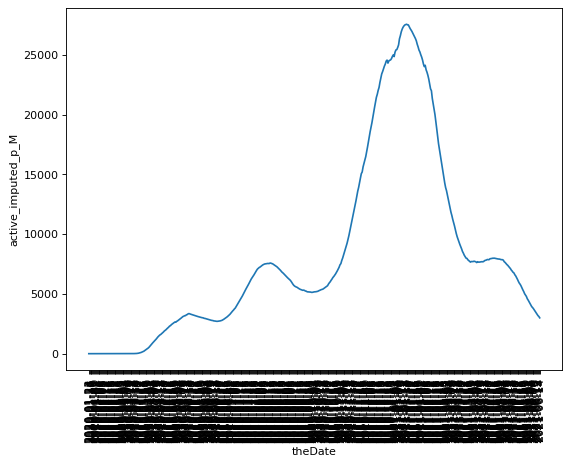

In [11]:
plt.figure(figsize=(8, 6), dpi=80)

sns.lineplot(x="theDate", y="active_imputed_p_M",legend = 'full' , data=df_US)
plt.xticks(rotation = 'vertical')

plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller #adfuller stands for Augmented Dickey-Fuller unit root test.

#The function find mean and standard deviation of the series and and performs augmented dickey fuller test.
#returns pvale .. The samaller the pvalue more stationary is the series.

def test_stationarity(timeseries, window = 15, cutoff = 0.01):
  rolmean = timeseries.rolling(window).mean()
  rolstd = timeseries.rolling(window).std()
  fig = plt.figure(figsize=(12, 8))
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC',)
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  pvalue = dftest[1]
  if pvalue < cutoff:
      print('p-value = %.4f. The series is likely stationary.' % pvalue)
  else:
      print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
  

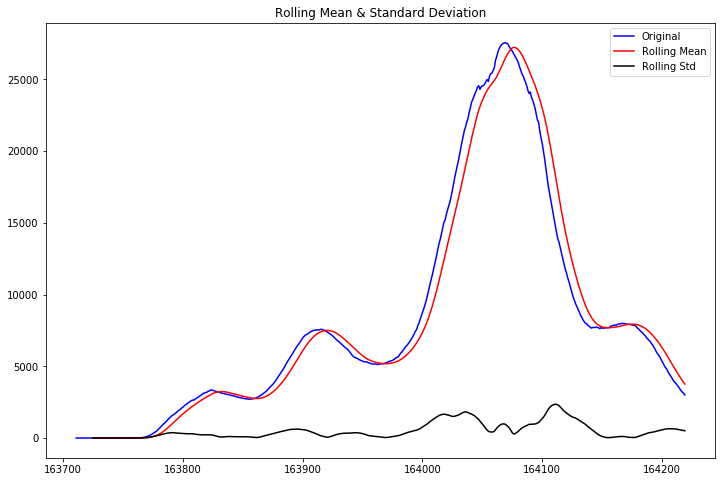

Results of Dickey-Fuller Test:
p-value = 0.0615. The series is likely non-stationary.


In [13]:
test_stationarity(df_US['active_imputed_p_M'])

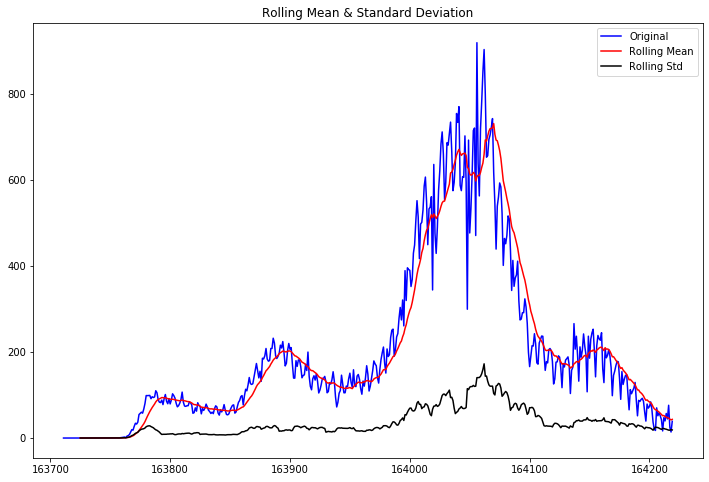

Results of Dickey-Fuller Test:
p-value = 0.4441. The series is likely non-stationary.


In [14]:
test_stationarity(df_US['new_confirmed_p_M'])

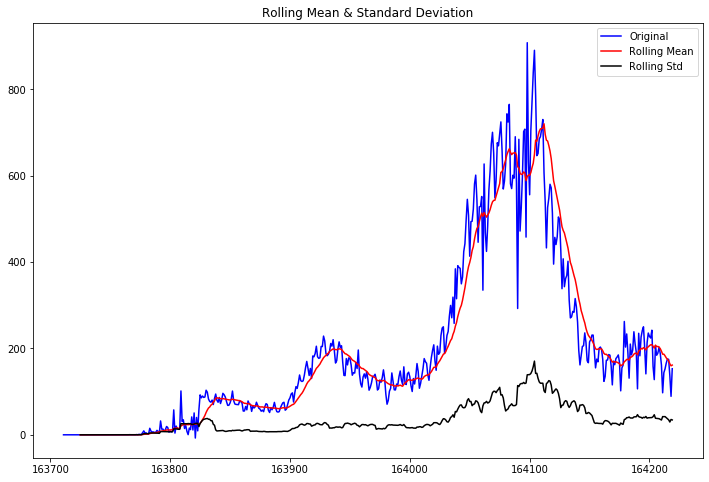

Results of Dickey-Fuller Test:
p-value = 0.4464. The series is likely non-stationary.


In [15]:
test_stationarity(df_US['new_recovered_imputed_p_M'])

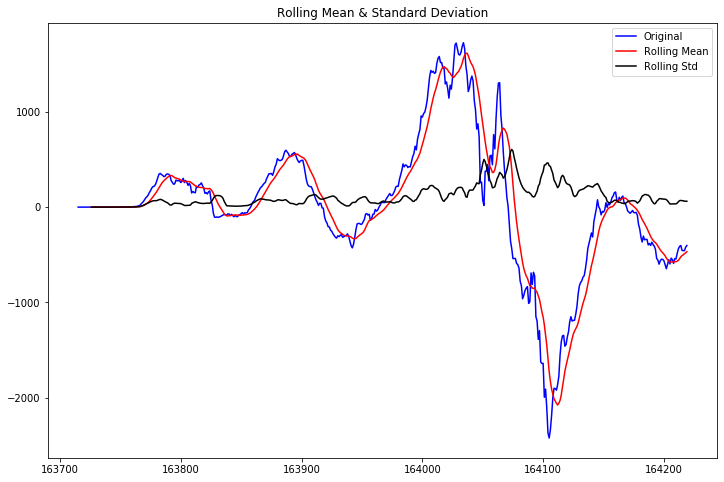

Results of Dickey-Fuller Test:
p-value = 0.2365. The series is likely non-stationary.


In [16]:
first_diff = df_US['active_imputed_p_M'] - df_US['active_imputed_p_M'].shift(4)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

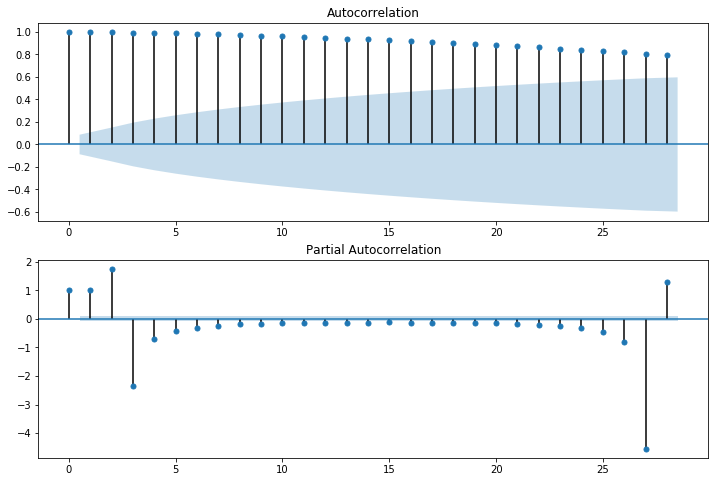

In [17]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_US['active_imputed_p_M'], ax=ax1, ) # using default value of lag
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_US['active_imputed_p_M'], ax=ax2) # using default value of lag

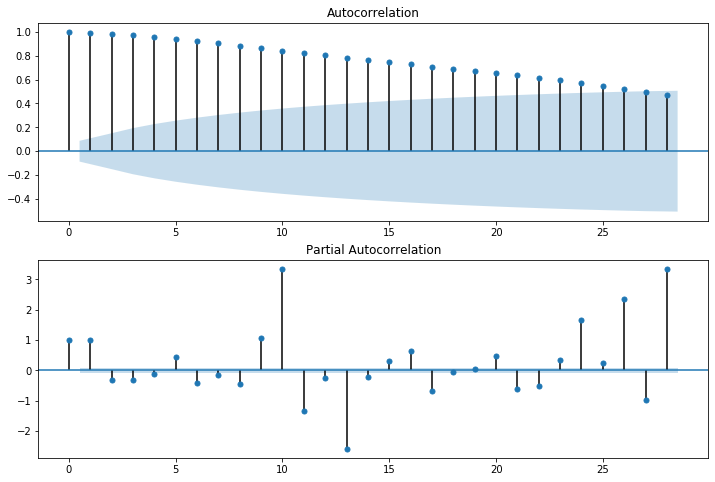

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, ax=ax2)

In [19]:
 #we can see a recurring correlation exists in both ACF and PACF hece we should choose SARIMAX model which also deals with seasonality

#RULE : A model with no orders of differencing assumes that the original series is stationary (mean-reverting). A model with one order of differencing assumes that 
      #the original series has a constant average trend (e.g. a random walk or SES-type model, with or without growth). A model with two orders of total differencing assumes that 
      #the original series has a time-varying trend 

#Since our series has a contant average trend ( with growth ) we would take I = 1 and MA = 0 ( I-1 ).


sarimax_mod = sm.tsa.statespace.SARIMAX(df_US['active_imputed_p_M'], trend='n', order=(14,1,0)).fit()
print(sarimax_mod.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:     active_imputed_p_M   No. Observations:                  509
Model:              SARIMAX(14, 1, 0)   Log Likelihood               -2752.256
Date:                Fri, 18 Jun 2021   AIC                           5534.513
Time:                        07:29:26   BIC                           5597.970
Sample:                             0   HQIC                          5559.396
                                - 509                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3475      0.023     15.265      0.000       0.303       0.392
ar.L2          0.3116      0.041      7.645      0.000       0.232       0.391
ar.L3          0.2168      0.043      5.040      0.0

In [20]:
D = df_US

In [21]:
D['theDate'] = pd.to_datetime(D['theDate'], format="%Y-%m-%d")
D.set_index('theDate', inplace=True)

In [22]:
D

,new_recovered_imputed_p_M,active_imputed_p_M,new_confirmed_p_M
theDate,,,
2020-01-23,0.000000,0.003057,0.000000
2020-01-24,0.000000,0.006113,0.003057
2020-01-25,0.000000,0.006113,0.000000
2020-01-26,0.000000,0.015283,0.009170
2020-01-27,0.000000,0.015283,0.000000
...,...,...,...
2021-06-10,175.616501,3402.043982,44.451246
2021-06-11,174.720935,3301.468569,76.120046
2021-06-12,136.795400,3188.905409,25.085015


In [24]:
from fbprophet import Prophet
# prophet preformance
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

# don't do this 
warnings.filterwarnings('ignore')

Importing plotly failed. Interactive plots will not work.


In [76]:
# set prophet model 
model1 = Prophet()

In [77]:
df_apM = df_US[['theDate','active_imputed_p_M']]
df_apM.columns = ['ds','y']
# convert dates from string to datetime
df_apM.ds = pd.to_datetime(df_apM.ds)


In [78]:
# fit $wmt data to model
model1.fit(df_apM)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
# build future dataframe for 5 years
build_forecast = model1.make_future_dataframe(periods=60, freq='D')

In [80]:
# forecast future df w/ model
forecast = model1.predict(build_forecast)

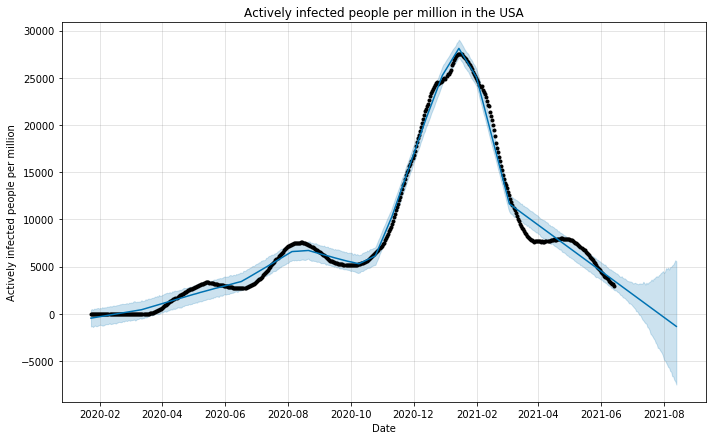

In [81]:
model1.plot(forecast, xlabel='Date', ylabel='Actively infected people per million')
plt.title('Actively infected people per million in the USA')
# display graph
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


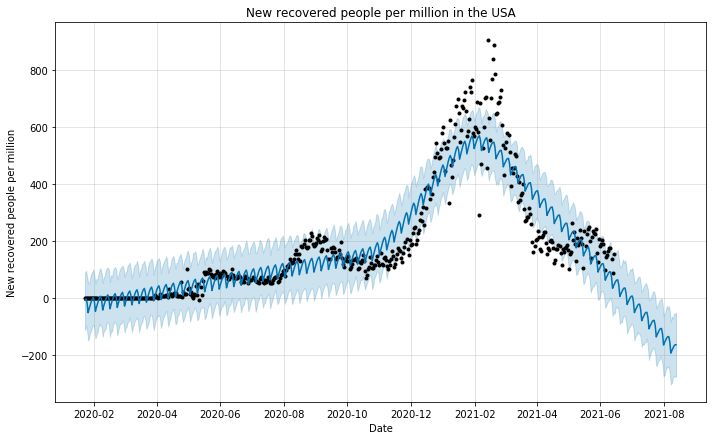

In [69]:
model2 = Prophet()
df_nrpM = df_US[['theDate','new_recovered_imputed_p_M']]
df_nrpM.columns = ['ds','y']
# convert dates from string to datetime
df_nrpM.ds = pd.to_datetime(df_nrpM.ds)
model2.fit(df_nrpM)
build_forecast = model2.make_future_dataframe(periods=60, freq='D')
forecast = model2.predict(build_forecast)
model2.plot(forecast, xlabel='Date', ylabel='New recovered people per million')
plt.title('New recovered people per million in the USA')
# display graph
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


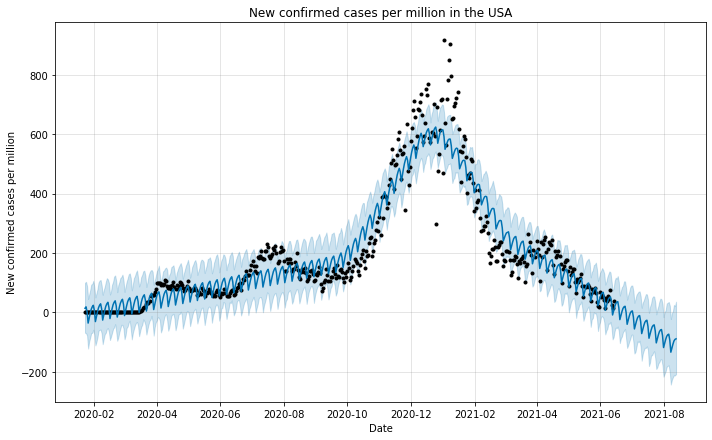

In [74]:
model3 = Prophet()
df_cpM = df_US[['theDate','new_confirmed_p_M']]
df_cpM.columns = ['ds','y']
# convert dates from string to datetime
df_cpM.ds = pd.to_datetime(df_cpM.ds)
model3.fit(df_cpM)
build_forecast = model3.make_future_dataframe(periods=60, freq='D')
forecast = model3.predict(build_forecast)
model3.plot(forecast, xlabel='Date', ylabel='New confirmed cases per million')
plt.title('New confirmed cases per million in the USA')
# display graph
plt.show()